# Classificação de espécies de flores Iris
No programa desenvolvido como parte do curso de python para data science do ICMC foi aplicado um modelo de machine learning para classificação de flores Iris nas espécies: Iris setosa, Iris versicolor, Iris virginica. Para tanto, por meio da biblioteca sklearn, optou-se pela implementação o modelo de K-Nearest Neighbors (KNN) para o problema.

O modelo utiliza como inputs os parâmetros PetalWidth(Espessura de Pétala), SepalWidth(Espessura de Sépala) e SepalLength(Comprimento de Sépala) para obter como output do modelo de machine learning a espécie da flor.

Dessa forma, como pode ser verificado com o código pode-se obter um modelo para classificação das flores com aproximadamente 96% de acurácia.

Além disso vale mencionar que não foi utilizado os dados de PetalLength(Comprimento de pétala) do dataset(iris.data) devido ao fato de que se virificou uma alta correlação entre os parâmetro PetalWidth e PetalLength.

---





Para investigação e tratamento dos dados:

Primeiros dados do dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Descrição básica da bilbioteca pandas:

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
7

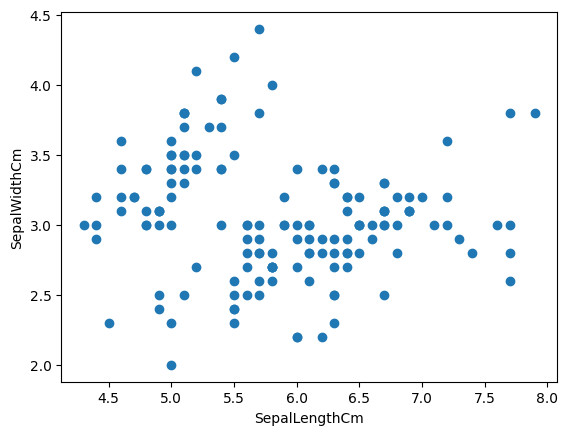


Matriz de correlação SepalLength vs Sepal Width:  [[ 1.         -0.10936925]
 [-0.10936925  1.        ]]



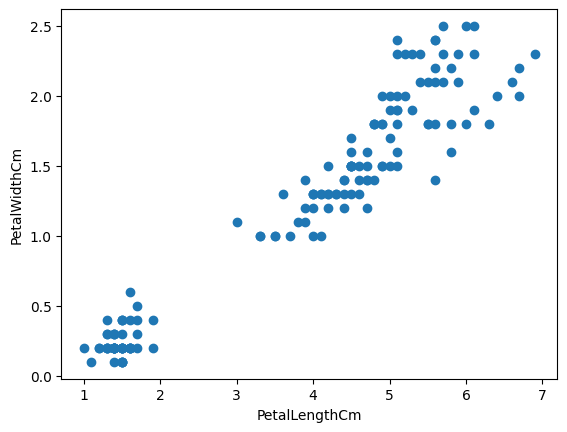


Matriz de correlação PetalLength vs Petal Width:  [[1.        0.9627571]
 [0.9627571 1.       ]]


Accuracy: 0.96
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time
import numpy as np

class Modelo():
    def __init__(self):
        pass

    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados a partir de um arquivo CSV.

        Parâmetros:
        - path (str): Caminho para o arquivo CSV contendo o dataset.

        O dataset é carregado com as seguintes colunas: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm e Species.
        """
        path = 'iris.data'
        names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=names)

    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.

        Sugestões para o tratamento dos dados:
            * Utilize `self.df.head()` para visualizar as primeiras linhas e entender a estrutura.
            * Verifique a presença de valores ausentes e faça o tratamento adequado.
            * Considere remover colunas ou linhas que não são úteis para o treinamento do modelo.

        Dicas adicionais:
            * Explore gráficos e visualizações para obter insights sobre a distribuição dos dados.
            * Certifique-se de que os dados estão limpos e prontos para serem usados no treinamento do modelo.
        """

        print("Para investigação e tratamento dos dados:")
        print()

        print("Primeiros dados do dataset:")
        print(self.df.head())
        print()
        print()

        print("Descrição básica da bilbioteca pandas para o dataset:")
        print()
        print(self.df.describe())
        print()
        print()


        print("Gráficos de disperção dos dados: ")
        print()
        fig, ax = plt.subplots()

        ax.set_xlabel('SepalLengthCm')
        ax.set_ylabel('SepalWidthCm')
        ax.scatter(self.df['SepalLengthCm'], self.df['SepalWidthCm'])
        plt.show()
        print()

        matrix = np.corrcoef(self.df['SepalLengthCm'], self.df['SepalWidthCm'])
        print("Matriz de correlação SepalLength vs Sepal Width: ", matrix) # Alta correlação, então remover uma delas

        print()

        fig2, ax2 = plt.subplots()

        ax2.set_xlabel('PetalLengthCm')
        ax2.set_ylabel('PetalWidthCm')
        ax2.scatter(self.df['PetalLengthCm'], self.df['PetalWidthCm'])
        plt.show()
        print()

        matrix = np.corrcoef(self.df['PetalLengthCm'], self.df['PetalWidthCm'])
        print("Matriz de correlação PetalLength vs Petal Width: ", matrix) # Alta correlação, então remover uma delas
        print()
        print()

        self.df = self.df.drop('PetalLengthCm', axis=1)

        pass

    def Treinamento(self):
        """
        Treina o modelo de machine learning.

        Detalhes:
            * Utilize a função `train_test_split` para dividir os dados em treinamento e teste.
            * Escolha o modelo de machine learning que queira usar. Lembrando que não precisa ser SMV e Regressão linear.
            * Experimente técnicas de validação cruzada (cross-validation) para melhorar a acurácia final.

        Nota: Esta função deve ser ajustada conforme o modelo escolhido.
        """

        X = np.array(self.df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]) # input
        y = np.array(self.df['Species']) # output
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        # Defina o classificador como um atributo de instância
        self.knn = KNeighborsClassifier(n_neighbors=3)
        self.knn.fit(X_train, y_train)

        # Salve os conjuntos de teste para uso posterior
        self.X_test = X_test
        self.y_test = y_test


        pass

    def Teste(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.

        Esta função deve ser implementada para testar o modelo e calcular métricas de avaliação relevantes,
        como acurácia, precisão, ou outras métricas apropriadas ao tipo de problema.
        """
        y_pred_knn = self.knn.predict(self.X_test)
        print("Accuracy:", accuracy_score(self.y_test, y_pred_knn))
        print(classification_report(self.y_test, y_pred_knn))
        pass

    def Train(self):
        """
        Função principal para o fluxo de treinamento do modelo.

        Este método encapsula as etapas de carregamento de dados, pré-processamento e treinamento do modelo.
        Sua tarefa é garantir que os métodos `CarregarDataset`, `TratamentoDeDados` e `Treinamento` estejam implementados corretamente.

        Notas:
            * O dataset padrão é "iris.data", mas o caminho pode ser ajustado.
            * Caso esteja executando fora do Colab e enfrente problemas com o path, use a biblioteca `os` para gerenciar caminhos de arquivos.
        """
        self.CarregarDataset("iris.data")  # Carrega o dataset especificado.

        # Tratamento de dados opcional, pode ser comentado se não for necessário
        self.TratamentoDeDados()

        self.Treinamento()  # Executa o treinamento do modelo

# Lembre-se de instanciar as classes após definir suas funcionalidades
# Recomenda-se criar ao menos dois modelos (e.g., Regressão Linear e SVM) para comparar o desempenho.
# A biblioteca já importa LinearRegression e SVC, mas outras escolhas de modelo são permitidas.
modelo = Modelo()
modelo.Train()
modelo.Teste()